## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)




In [8]:
mouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
studyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
# Combine the data into a single dataset
data_df = pd.merge(mouseData, studyResults, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
# data_df['Mouse ID'].value_counts()
mouseCount = len(data_df['Mouse ID'].unique())
mouseCount

249

In [18]:
totalCount = len(data_df['Mouse ID'])
totalCount

1893

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
dups_df = pd.DataFrame(dups)
dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
totalNewCount = len(dups_df['Mouse ID'])
totalNewCount

1888

In [38]:
data_df['Mouse ID'].value_counts()

g989    13
j119    10
g296    10
b559    10
j984    10
        ..
b447     1
t573     1
x226     1
l872     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
dups_df['Mouse ID'].value_counts()

j119    10
g296    10
b559    10
j984    10
c766    10
        ..
u153     1
x336     1
h428     1
n482     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # Assemble the resulting series into a single summary dataframe.
groupDrug_df = dups_df.groupby('Drug Regimen')
tumVol_mean = groupDrug_df['Tumor Volume (mm3)'].mean()
tumVol_median = groupDrug_df['Tumor Volume (mm3)'].median()
tumVol_stddev = groupDrug_df['Tumor Volume (mm3)'].std()
tumVol_var = tumVol_stddev*tumVol_stddev
tumVol_SEM = groupDrug_df['Tumor Volume (mm3)'].sem()

summaryTable = pd.DataFrame({"Mean" : tumVol_mean, "Median" : tumVol_median,"Variance" : tumVol_var,"Std Dev" : tumVol_stddev,"SEM" : tumVol_SEM})
summaryTable

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_by = dups_df.groupby('Drug Regimen')
agg_df = agg_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

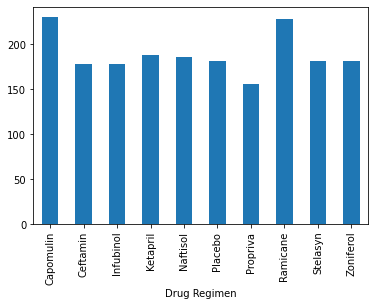

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugTM = dups_df.groupby(['Drug Regimen']).count()['Mouse ID']

Bar_pandas = drugTM.plot.bar()
Bar_pandas

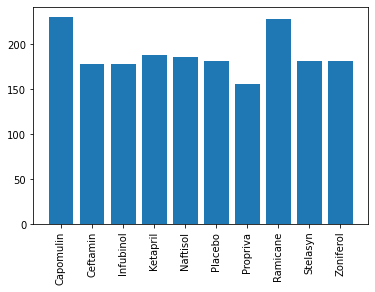

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugTM))
plt.bar(x_axis, drugTM)

drugNames = [value for value in x_axis]
plt.xticks(drugNames, drugTM.index.values)
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:title={'center':'Male vs. Female'}>

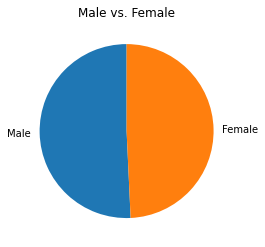

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexes = dups_df['Sex'].value_counts()
Pie_pandas = sexes.plot.pie(ylabel = '',startangle=90, title='Male vs. Female')
Pie_pandas

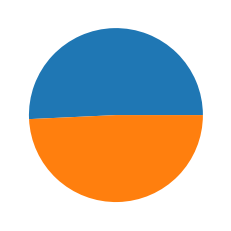

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexes)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
